# About Data
- This classic dataset contains the sales and ottributes of different games .
- Approx -16719 games name and sales 

# <h1>Data Description
- Name : Game name 
- Platform : In which platform games are available for gamers 
- Year : which year this game published 
- Genre : category of games 
- Publisher : which company create and publish the game 
- NA_sales : North america total sales
- EU_sales : Europe sales 
- JP_sales : japan country total sales 
- Other sales : without above three country different country sales 
- Global_sales : world wide total sales 
- Critic_score :
- Critic_count:
- user_score : is user satisfied with this game that score out of 10
- user_count : How much gamer appericiate this game and played
- Developer : which developer company develop this game 
- Rating : User rating about this game


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, OneHotEncoder, StandardScaler, Normalizer, MaxAbsScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor,HistGradientBoostingRegressor,StackingRegressor

import warnings
warnings.filterwarnings("ignore")

# Read data

In [36]:
game = pd.read_csv(r'E:/INTERN\Asterisc Technocrat Pvt. Ltd intern/VIDEOGAME/Video.csv')

In [37]:
df = game.copy()

In [38]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [40]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [41]:
df.isnull().sum()*100/df.shape[0]

Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         40.098092
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64

In [42]:
df['Name'].value_counts().to_frame().shape

(11562, 1)

In [43]:
df['Developer'].value_counts()

Developer
Ubisoft                                   204
EA Sports                                 172
EA Canada                                 167
Konami                                    162
Capcom                                    139
                                         ... 
Genki, Kojima Productions                   1
Warner Bros. Interactive Entertainment      1
THQ, Altron                                 1
Netherock Ltd.                              1
Interchannel-Holon                          1
Name: count, Length: 1696, dtype: int64

In [44]:
df['Platform'].value_counts()

Platform
PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [45]:
df['Publisher'].value_counts()

Publisher
Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
                                ... 
Valve                              1
ITT Family Games                   1
Elite                              1
Evolution Games                    1
Red Flagship                       1
Name: count, Length: 581, dtype: int64

- drop less important feature 

In [46]:
df= df.drop(columns= ["Year_of_Release","Developer","Publisher","Platform"])

In [47]:
df

,Name,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Sports,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,E
1,Super Mario Bros.,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Racing,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Sports,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,E
4,Pokemon Red/Pokemon Blue,Role-Playing,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,Sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,Platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN


- Missing values check 

In [48]:
df.isnull().sum()

Name               2
Genre              2
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score    8582
Critic_Count    8582
User_Score      6704
User_Count      9129
Rating          6769
dtype: int64

In [49]:
df['User_Score']= df['User_Score'].apply(pd.to_numeric, errors= "coerce")

In [50]:
df.dtypes

Name             object
Genre            object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
Critic_Score    float64
Critic_Count    float64
User_Score      float64
User_Count      float64
Rating           object
dtype: object

In [51]:
numercial_column = ['NA_Sales','EU_Sales', 'JP_Sales','Other_Sales','Global_Sales','Critic_Score','Critic_Count','User_Count','User_Score']
categorical = ['Name','Genre','Rating']

In [52]:
imputer_numeric = SimpleImputer(strategy='mean')
imputer_category = SimpleImputer(strategy='constant', fill_value='NA')

In [53]:
df[numercial_column]= imputer_numeric.fit_transform(df[numercial_column])
df[categorical]= imputer_category.fit_transform(df[categorical])

In [54]:
df.isnull().sum()

Name            0
Genre           0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
Critic_Score    0
Critic_Count    0
User_Score      0
User_Count      0
Rating          0
dtype: int64

In [55]:
x = df.drop(columns=["Global_Sales","Name"])
y= df['Global_Sales']

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=300)

In [57]:
from sklearn.compose import ColumnTransformer

In [58]:
categorical = ['Genre','Rating']

In [59]:
ctra = ColumnTransformer(transformers=[("ohe", OneHotEncoder(sparse=False), categorical)], remainder="passthrough")

In [60]:
x_train

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
14266,Role-Playing,0.00,0.00,0.03,0.00,68.967679,26.360821,7.125046,162.229908,NA
10715,Role-Playing,0.00,0.00,0.10,0.00,68.967679,26.360821,7.125046,162.229908,NA
16688,Adventure,0.00,0.00,0.01,0.00,68.967679,26.360821,7.125046,162.229908,NA
12778,Racing,0.04,0.01,0.00,0.00,58.000000,17.000000,7.125046,162.229908,T
9861,Sports,0.00,0.00,0.12,0.00,68.967679,26.360821,7.125046,162.229908,NA
...,...,...,...,...,...,...,...,...,...,...
12793,Adventure,0.00,0.00,0.06,0.00,68.967679,26.360821,7.125046,162.229908,NA
15766,Misc,0.00,0.00,0.02,0.00,68.967679,26.360821,7.125046,162.229908,NA
7146,Misc,0.00,0.00,0.22,0.00,68.967679,26.360821,7.125046,162.229908,NA
5834,Racing,0.29,0.00,0.00,0.02,62.000000,24.000000,4.100000,14.000000,E


In [61]:
x_train = ctra.fit_transform(x_train)


In [62]:
x_test = ctra.transform(x_test)

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor,HistGradientBoostingRegressor,StackingRegressor

In [64]:
lor= LinearRegression()
lor.fit(x_train,y_train)


LinearRegression()

In [65]:
y_pred = lor.predict(x_test)

In [66]:
r2_score(y_test, y_pred)

0.9999802089322556

In [67]:
pd.DataFrame({"orid":y_test, "pred":y_pred}).sort_values(by="pred", ascending=False)

,orid,pred
11,23.21,23.208329
24,16.15,16.148020
34,13.79,13.789132
36,13.47,13.467834
42,12.61,12.618476
...,...,...
16160,0.01,0.009876
15956,0.02,0.009869
15651,0.02,0.009670
16156,0.01,0.009654


<Axes: xlabel='Global_Sales', ylabel='Density'>

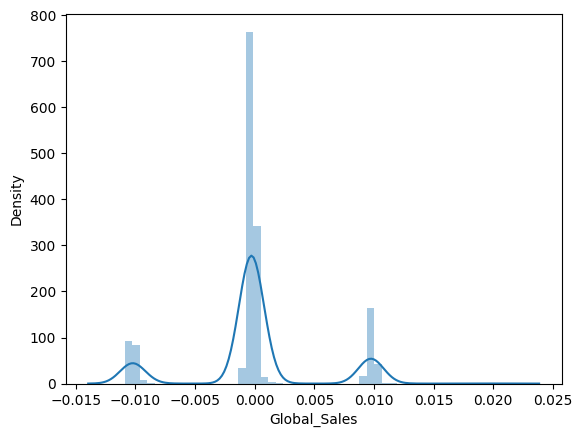

In [68]:
sns.distplot(y_test- y_pred)